In [1]:
using RDatasets
using DataFrames
using DataStructures
using StatsPlots # plot datafrmes
#using Plots # default plot
#using Gadfly # Rich but slow

In [2]:
# ; -> disable output
iris = dataset("datasets", "iris");
println(size(iris))

(150, 5)


In [3]:
first(iris, 10) # head

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [4]:
describe(iris)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,SepalLength,5.84333,4.3,5.8,7.9,,,Float64
2,SepalWidth,3.05733,2.0,3.0,4.4,,,Float64
3,PetalLength,3.758,1.0,4.35,6.9,,,Float64
4,PetalWidth,1.19933,0.1,1.3,2.5,,,Float64
5,Species,,setosa,,virginica,3,,CategoricalString{UInt8}


In [5]:
# select! -> inplace=True
# size(data, 2) -> -1
X = select(iris, Not(size(iris, 2)));
y = iris[:, end];

In [6]:
println(size(iris))
println(size(X))
println(size(y))

(150, 5)
(150, 4)
(150,)


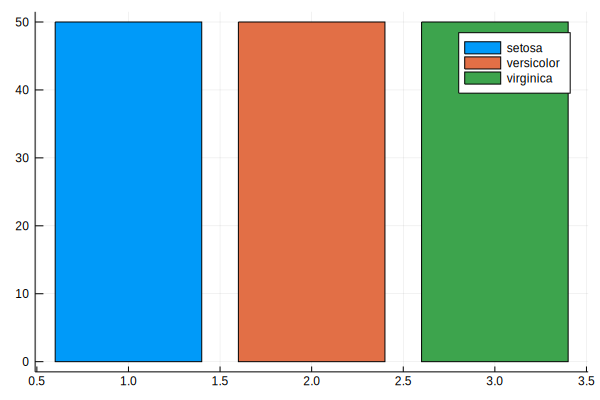

In [7]:
classes = unique(iris[!, size(iris, 2)])
cnt = counter(iris[!, size(iris, 2)])
cnt = [cnt[i] for i in classes]
#=
test = []
for i in classes
    append!(test, a[i])
end
=#

bar(cnt, group=classes)

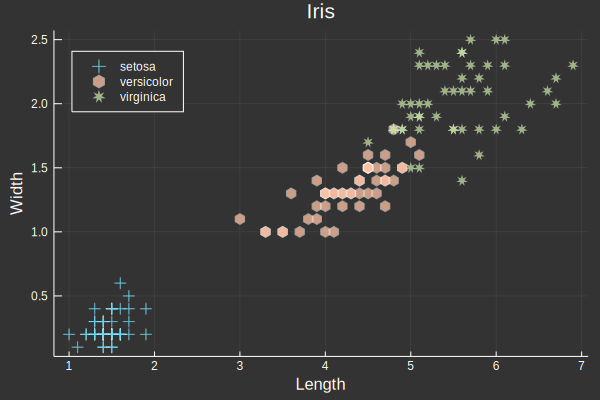

In [8]:
@df iris scatter(
    :PetalLength, :PetalWidth, group=:Species,
    title="Iris", xlabel="Length", ylabel="Width",
    m=(0.5, [:cross :hex :star7], 5),
    legend=:topleft,
    bg=RGB(.2, .2, .2)
)

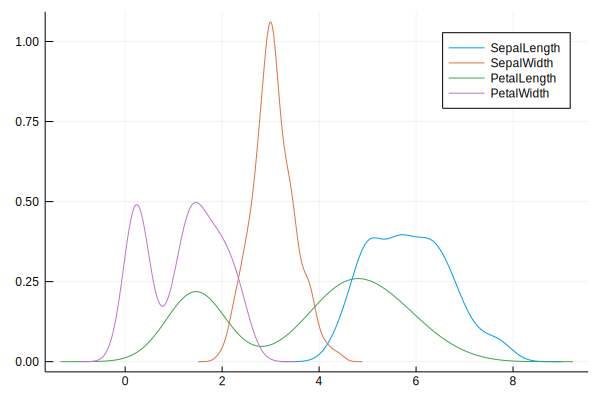

In [9]:
@df iris density(cols(1:size(iris, 2)-1))

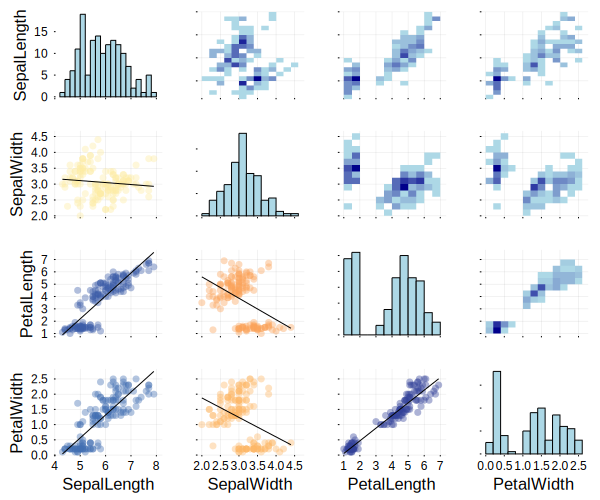

In [10]:
gr(size=(600, 500))
@df iris corrplot(cols(1:4), bins=20, fillcolor=:blues)

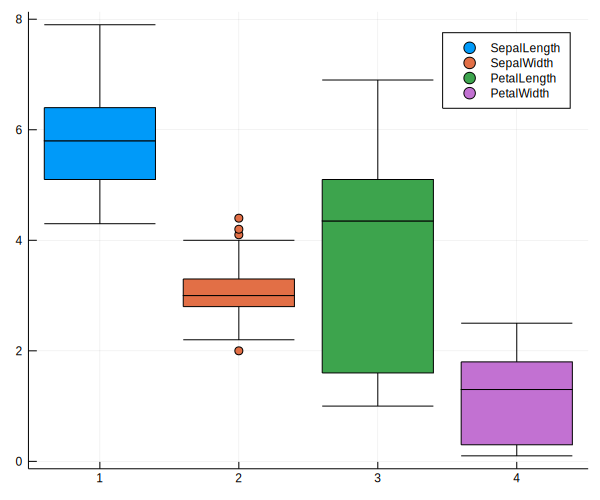

In [11]:
@df iris boxplot(cols(1:size(iris, 2)-1))

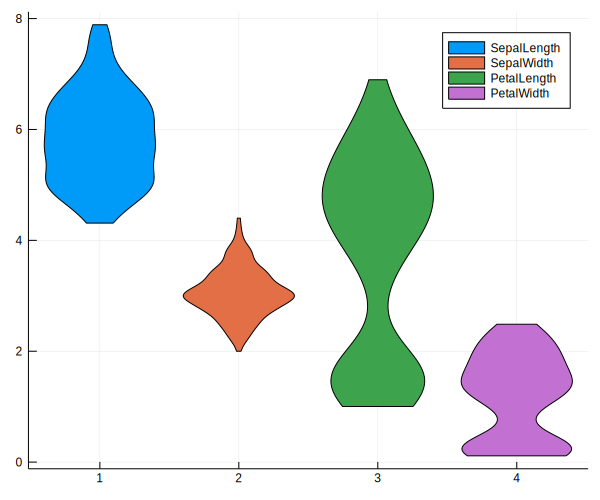

In [12]:
@df iris violin(cols(1:size(iris, 2)-1))

In [13]:
# Gadfly
#plot(iris, x=:PetalLength, y=:PetalWidth, color=:Species, Geom.point)